<a href="https://colab.research.google.com/github/shethnisarg95/machineLearning/blob/main/steg_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import sys
import time
import json
from IPython.display import display
from time import strftime, gmtime
pd.options.display.float_format = '{:.6f}'.format
pd.set_option('display.max_columns', 500)

In [ ]:
invoice_test = pd.read_csv('/content/sample_data/invoice_test.csv',low_memory=False)
invoice_train = pd.read_csv('/content/sample_data/invoice_train.csv',low_memory=False)
client_test = pd.read_csv('/content/sample_data/client_test.csv',low_memory=False)
client_train = pd.read_csv('/content/sample_data/client_train.csv',low_memory=False)
# sample_submission = pd.read_csv('SampleSubmission (2).csv',low_memory=False)

In [ ]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,3/24/2014,11,1335667.000000,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,3/29/2013,11,1335667.000000,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,3/23/2015,11,1335667.000000,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,7/13/2015,11,1335667.000000,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,11/17/2016,11,1335667.000000,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
invoice_train.describe()

,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,20.136262,120919976163.969818,0.042034,172.221215,7.315270,1.000236,409.744560,107.568247,20.413433,54.059972,17803.139944,18388.091123,46.322005
std,13.482457,1646702365322.332520,0.374541,133.582275,1.359625,0.083065,588.274630,1169.327987,163.644014,979.218349,40621.214714,41228.513632,2594.754034
min,8.000000,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,121473.000000,0.000000,5.000000,6.000000,1.000000,79.000000,0.000000,0.000000,0.000000,1792.000000,2057.000000,4.000000
50%,11.000000,490475.000000,0.000000,203.000000,6.000000,1.000000,272.000000,0.000000,0.000000,0.000000,7718.000000,8218.000000,4.000000
75%,40.000000,1112725.000000,0.000000,207.000000,9.000000,1.000000,601.000000,0.000000,0.000000,0.000000,21819.000000,22520.000000,4.000000
max,45.000000,27381100000000.000000,5.000000,600.000000,9.000000,50.000000,98889.000000,819886.000000,45360.000000,343568.000000,2800280.000000,2870972.000000,294406.000000


In [ ]:
invoice_train.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [ ]:
client_train.isna().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


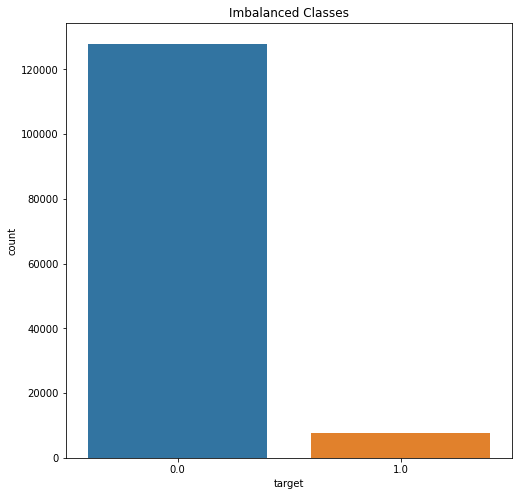

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=client_train)
plt.title('Imbalanced Classes')
plt.show()

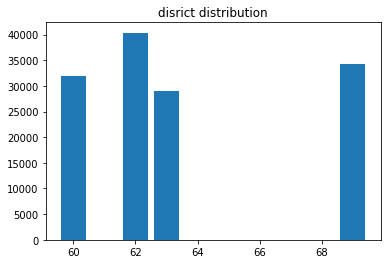

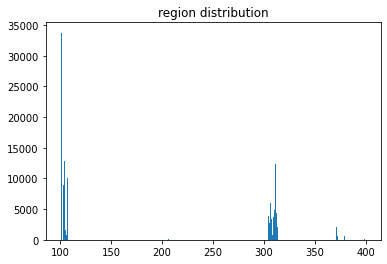

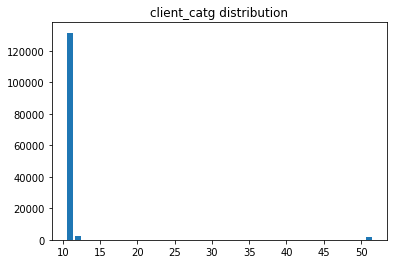

In [ ]:
for col in ['disrict','region','client_catg']:
    ds = client_train.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()
  

In [ ]:
print('Number of missing rows in invoice_train:',invoice_train.isna().sum().sum())
print('Number of missing rows in invoice_test:',invoice_test.isna().sum().sum(),'\n')
print('Number of missing rows in client_train:',client_train.isna().sum().sum())
print('Number of missing rows in client_test:',client_test.isna().sum().sum())


Number of missing rows in invoice_train: 0
Number of missing rows in invoice_test: 0 

Number of missing rows in client_train: 0
Number of missing rows in client_test: 0


In [ ]:
print('Number of unique values in invoice_train:')
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

Number of unique values in invoice_train:
client_id - 31603
invoice_date - 5963
tarif_type - 13
counter_number - 47892
counter_statue - 6
counter_code - 34
reading_remarque - 4
counter_coefficient - 9
consommation_level_1 - 5019
consommation_level_2 - 7098
consommation_level_3 - 1426
consommation_level_4 - 6444
old_index - 93128
new_index - 94576
months_number - 488
counter_type - 2


In [ ]:
def feature_change(cl, inv):

    cl['client_catg'] = cl['client_catg'].astype('category')
    cl['disrict'] = cl['disrict'].astype('category')
    cl['region'] = cl['region'].astype('category')
    cl['region_group'] = cl['region'].apply(lambda x: 100 if x<100 else 300 if x>300 else 200)
    cl['creation_date'] = pd.to_datetime(cl['creation_date'])
    
    cl['coop_time'] = (2019 - cl['creation_date'].dt.year)*12 - cl['creation_date'].dt.month

    inv['counter_type'] = inv['counter_type'].map({"ELEC":1,"GAZ":0})
    inv['counter_statue'] = inv['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,769:5,'0':0,'5':5,'1':1,'4':4,'A':0,618:5,269375:5,46:5,420:5})
    
    inv['invoice_date'] = pd.to_datetime(inv['invoice_date'], dayfirst=True)
    inv['invoice_month'] = inv['invoice_date'].dt.month
    inv['invoice_year'] = inv['invoice_date'].dt.year
    inv['is_weekday'] = ((pd.DatetimeIndex(inv.invoice_date).dayofweek) // 5 == 1).astype(float)
    inv['delta_index'] = inv['new_index'] - inv['old_index']
    
    return cl, inv

In [ ]:
client_train1, invoice_train1 = feature_change(client_train, invoice_train)
client_test1, invoice_test1 = feature_change(client_test, invoice_test)

In [ ]:
def agg_feature(invoice, client_df, agg_stat):
    
    invoice['delta_time'] = invoice.sort_values(['client_id','invoice_date']).groupby('client_id')['invoice_date'].diff().dt.days.reset_index(drop=True)
    agg_trans = invoice.groupby('client_id')[agg_stat+['delta_time']].agg(['mean','std','min','max'])
    
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = invoice.groupby('client_id').size().reset_index(name='transactions_count')
    agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')
    
    weekday_avg = invoice.groupby('client_id')[['is_weekday']].agg(['mean'])
    weekday_avg.columns = ['_'.join(col).strip() for col in weekday_avg.columns.values]
    weekday_avg.reset_index(inplace=True)
    client_df = pd.merge(client_df, weekday_avg, on='client_id', how='left')
    
    full_df = pd.merge(client_df, agg_trans, on='client_id', how='left')
    
    full_df['invoice_per_cooperation'] = full_df['transactions_count'] / full_df['coop_time']
    
    return full_df

In [ ]:
agg_stat_columns = [
 'tarif_type',
 'counter_number',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'old_index',
 'new_index',
 'months_number',
 'counter_type',
 'invoice_month',
 'invoice_year',
 'delta_index'
]

train_df1 = agg_feature(invoice_train1, client_train1, agg_stat_columns)
test_df1 = agg_feature(invoice_test1, client_test1, agg_stat_columns)

In [ ]:
train_df1.head()

,disrict,client_id,client_catg,region,creation_date,target,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,counter_number_mean,counter_number_std,counter_number_min,counter_number_max,counter_statue_mean,counter_statue_std,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_std,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_std,reading_remarque_min,reading_remarque_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_std,old_index_min,old_index_max,new_index_mean,new_index_std,new_index_min,new_index_max,months_number_mean,months_number_std,months_number_min,months_number_max,counter_type_mean,counter_type_std,counter_type_min,counter_type_max,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max,delta_index_mean,delta_index_std,delta_index_min,delta_index_max,delta_time_mean,delta_time_std,delta_time_min,delta_time_max,invoice_per_cooperation,tarif_type_range,tarif_type_max_mean,counter_number_range,counter_number_max_mean,counter_statue_range,counter_statue_max_mean,counter_code_range,counter_code_max_mean,reading_remarque_range,reading_remarque_max_mean,consommation_level_1_range,consommation_level_1_max_mean,consommation_level_2_range,consommation_level_2_max_mean,consommation_level_3_range,consommation_level_3_max_mean,consommation_level_4_range,consommation_level_4_max_mean,old_index_range,old_index_max_mean,new_index_range,new_index_max_mean,months_number_range,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,delta_index_range,delta_index_max_mean
0,60,train_Client_0,11,101,1994-12-31,0.000000,200,288,0.000000,35.000000,11.000000,0.000000,11.000000,11.000000,1335667.000000,0.000000,1335667.000000,1335667.000000,0.000000,0.000000,0.000000,0.000000,203.685714,1.529541,203.000000,207.000000,6.971429,1.248192,6.000000,9.000000,352.400000,310.343472,38.000000,1200.000000,10.571429,43.568935,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9444.542857,4527.744415,3685.000000,16493.000000,9807.514286,4579.666655,3809.000000,17078.000000,4.628571,2.101620,2.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7.000000,3.262983,2.000000,12.000000,2011.142857,3.695330,2005.000000,2019.000000,362.971429,341.553930,38.000000,1386.000000,144.147059,63.283936,112.000000,365.000000,0.121528,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,4.000000,1.016272,3.000000,1.290984,1162.000000,3.405221,186.000000,17.594595,0.000000,NaN,0.000000,NaN,12808.000000,1.746299,13269.000000,1.741318,10.000000,2.592593,0.000000,1.000000,10.000000,1.714286,14.000000,1.003907,1348.000000,3.818482
1,69,train_Client_1,11,107,2002-05-29,0.000000,200,199,0.000000,37.000000,11.000000,0.000000,11.000000,11.000000,678902.000000,0.000000,678902.000000,678902.000000,0.000000,0.000000,0.000000,0.000000,203.000000,0.000000,203.000000,203.000000,7.216216,1.377097,6.000000,9.000000,557.540541,197.935960,190.000000,1207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14330.756757,6124.126094,4110.000000,23940.000000,14888.297297,6119.723768,4661.000000,25022.000000,4.324324,1.375461,2.000000,8.000000,1.000000,0.000000,1.000000,1.000000,5.891892,3.323183,1.000000,11.000000,2011.837838,4.058691,2005.000000,2019.000000,557.540541,197.935960,190.000000,1207.000000,134.888889,39.797902,98.000000,

In [ ]:
train_df1.isna().sum()

disrict                        0
client_id                      0
client_catg                    0
region                         0
creation_date                  0
                           ...  
invoice_month_max_mean    103890
invoice_year_range        103890
invoice_year_max_mean     103890
delta_index_range         103890
delta_index_max_mean      104707
Length: 111, dtype: int64

In [ ]:
def new_features(df):
    
    for col in agg_stat_columns:
        df[col+'_range'] = df[col+'_max'] - df[col+'_min']
        df[col+'_max_mean'] = df[col+'_max']/df[col+'_mean']
    
    return df

In [ ]:
train_df2 = new_features(train_df1)
test_df2 = new_features(test_df1)

In [ ]:
print('The number of Non-Frauds are: ' + str(train_df2['target'].value_counts()[0]) + ' which is ', round(train_df2['target'].value_counts()[0]/len(train_df2) * 100,2), '% of the dataset')
print('The number of Frauds are: ' + str(train_df2['target'].value_counts()[1]) + ' which is ', round(train_df2['target'].value_counts()[1]/len(train_df2) * 100,2), '% of the dataset')

The number of Non-Frauds are: 127927 which is  94.42 % of the dataset
The number of Frauds are: 7566 which is  5.58 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


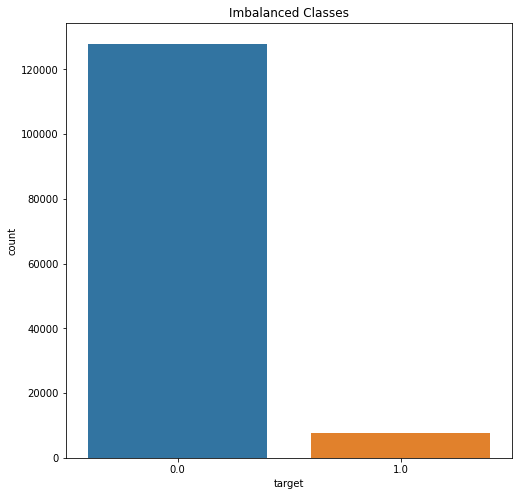

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=train_df2)
plt.title('Imbalanced Classes')
plt.show()

In [ ]:
train_df2.to_csv('train_imbalanced.csv', index=False)

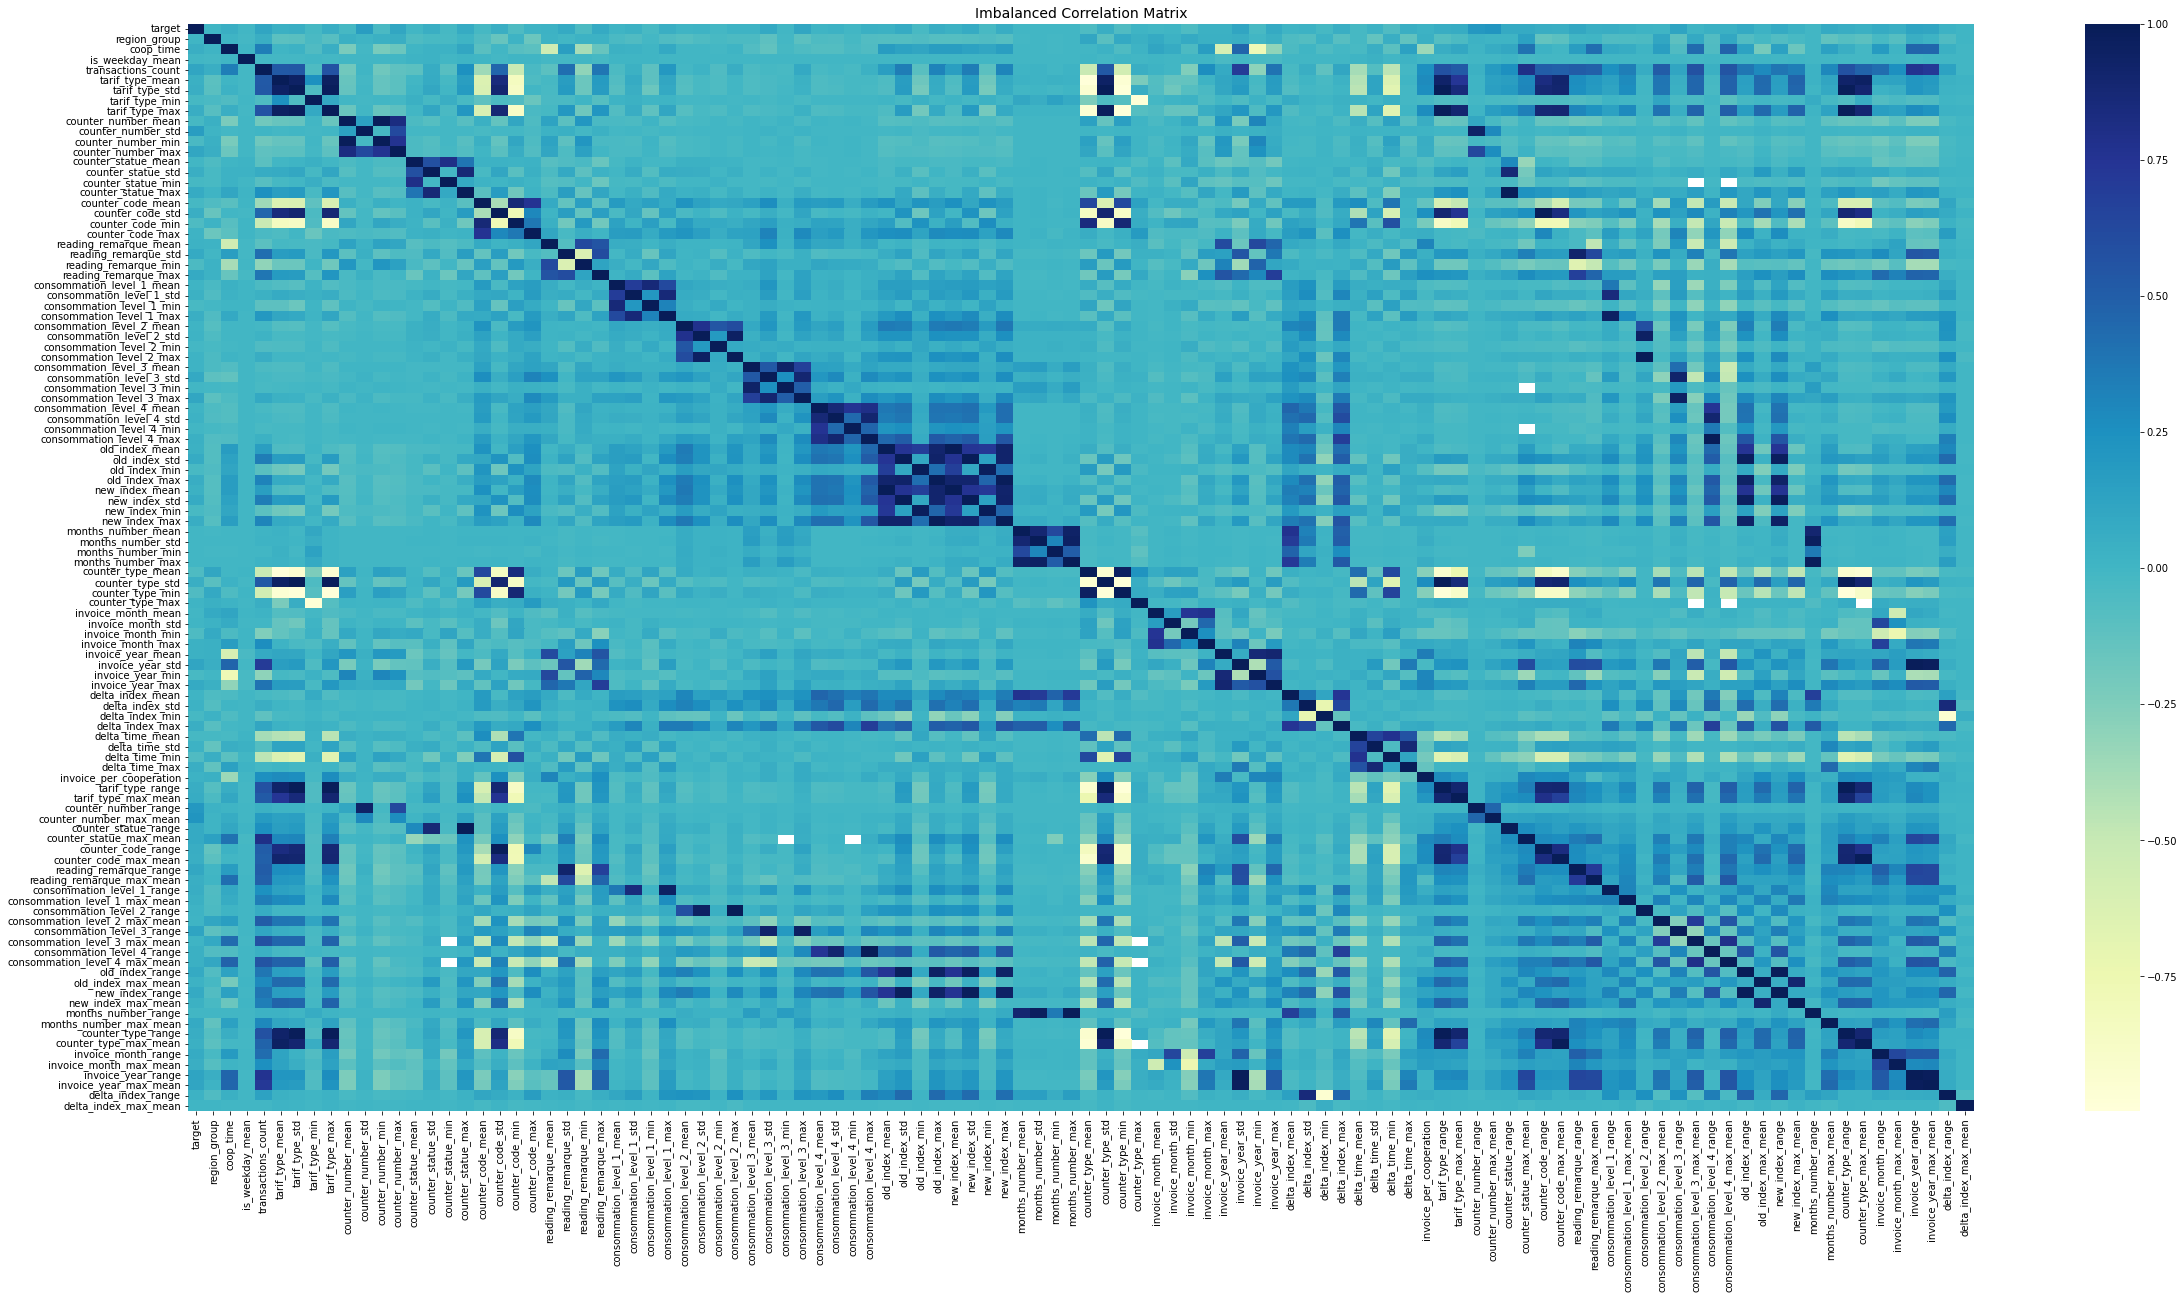

In [ ]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(40,20))         

# Imbalanced DataFrame Correlation
corr = train_df2.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
# Shuffle the Dataset.
train_df2 = train_df2.sample(frac=1,random_state=42)

x_res, y_res = ros.fit_resample(train_df2.drop(['target'], axis=1), train_df2['target'])
shuffled_normalized_df = pd.concat([y_res, x_res], axis = 1)
shuffled_normalized_df = shuffled_normalized_df.sample(frac=1,random_state=42)
shuffled_normalized_df.head()
print(len(shuffled_normalized_df))

#shuffled_normalized_df.to_csv('train_balanced_oversample.csv', index=False)
train_df2 = shuffled_normalized_df

255854


In [ ]:
train_df2.to_csv('train_balanced.csv', index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


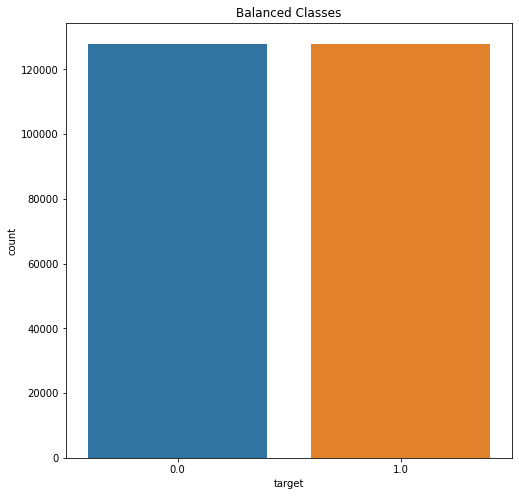

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=train_df2)
plt.title('Balanced Classes')
plt.show()

In [ ]:
print('The number of Non-Frauds are: ' + str(train_df2['target'].value_counts()[0]) + ' which is ', round(train_df2['target'].value_counts()[0]/len(train_df2) * 100,2), '% of the dataset')
print('The number of Frauds are: ' + str(train_df2['target'].value_counts()[1]) + ' which is ', round(train_df2['target'].value_counts()[1]/len(train_df2) * 100,2), '% of the dataset')

The number of Non-Frauds are: 127927 which is  50.0 % of the dataset
The number of Frauds are: 127927 which is  50.0 % of the dataset


In [ ]:
cat_cols = [col for col in train_df2.dtypes]
print(cat_cols)

# for col, typ in train_df2.items():
#   print(typ)
  # if(c ):
    # a = train_df2[c]
    # print('{0: <27}'.format(c), "\t-", a.min(), "-", a.max())

[dtype('float64'), CategoricalDtype(categories=[60, 62, 63, 69], ordered=False), dtype('O'), CategoricalDtype(categories=[11, 12, 51], ordered=False), CategoricalDtype(categories=[101, 103, 104, 105, 106, 107, 199, 206, 301, 302, 303, 304,
                  305, 306, 307, 308, 309, 310, 311, 312, 313, 371, 372, 379,
                  399],
, ordered=False), dtype('<M8[ns]'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64

In [ ]:
not_important_col = ['region_group',
 'counter_type_range',
 'counter_type_max',
 'counter_type_min',
 'months_number_min',
 'delta_index_std',
 'consommation_level_3_mean',
 'months_number_std',
 'delta_index_max_mean',
 'consommation_level_2_range']

def drop(df):

    col_drop = ['client_id', 'creation_date']
    var_colums = [col for col in df.columns if col in [*not_important_col, *col_drop]]
    for col in var_colums:
        df.drop([col], axis=1, inplace=True)
    return df

In [ ]:
train_df2.isna().sum()

target                         0
disrict                        0
client_id                      0
client_catg                    0
region                         0
                           ...  
invoice_month_max_mean    196245
invoice_year_range        196245
invoice_year_max_mean     196245
delta_index_range         196245
delta_index_max_mean      197110
Length: 111, dtype: int64

In [ ]:
train_df2 = drop(train_df2)
test_df2 = drop(test_df2)

In [ ]:
train_df2.isna().sum()

target                         0
disrict                        0
client_catg                    0
region                         0
coop_time                      0
                           ...  
invoice_month_range       196245
invoice_month_max_mean    196245
invoice_year_range        196245
invoice_year_max_mean     196245
delta_index_range         196245
Length: 99, dtype: int64

In [ ]:
train_df = train_df2.sample(frac=1)

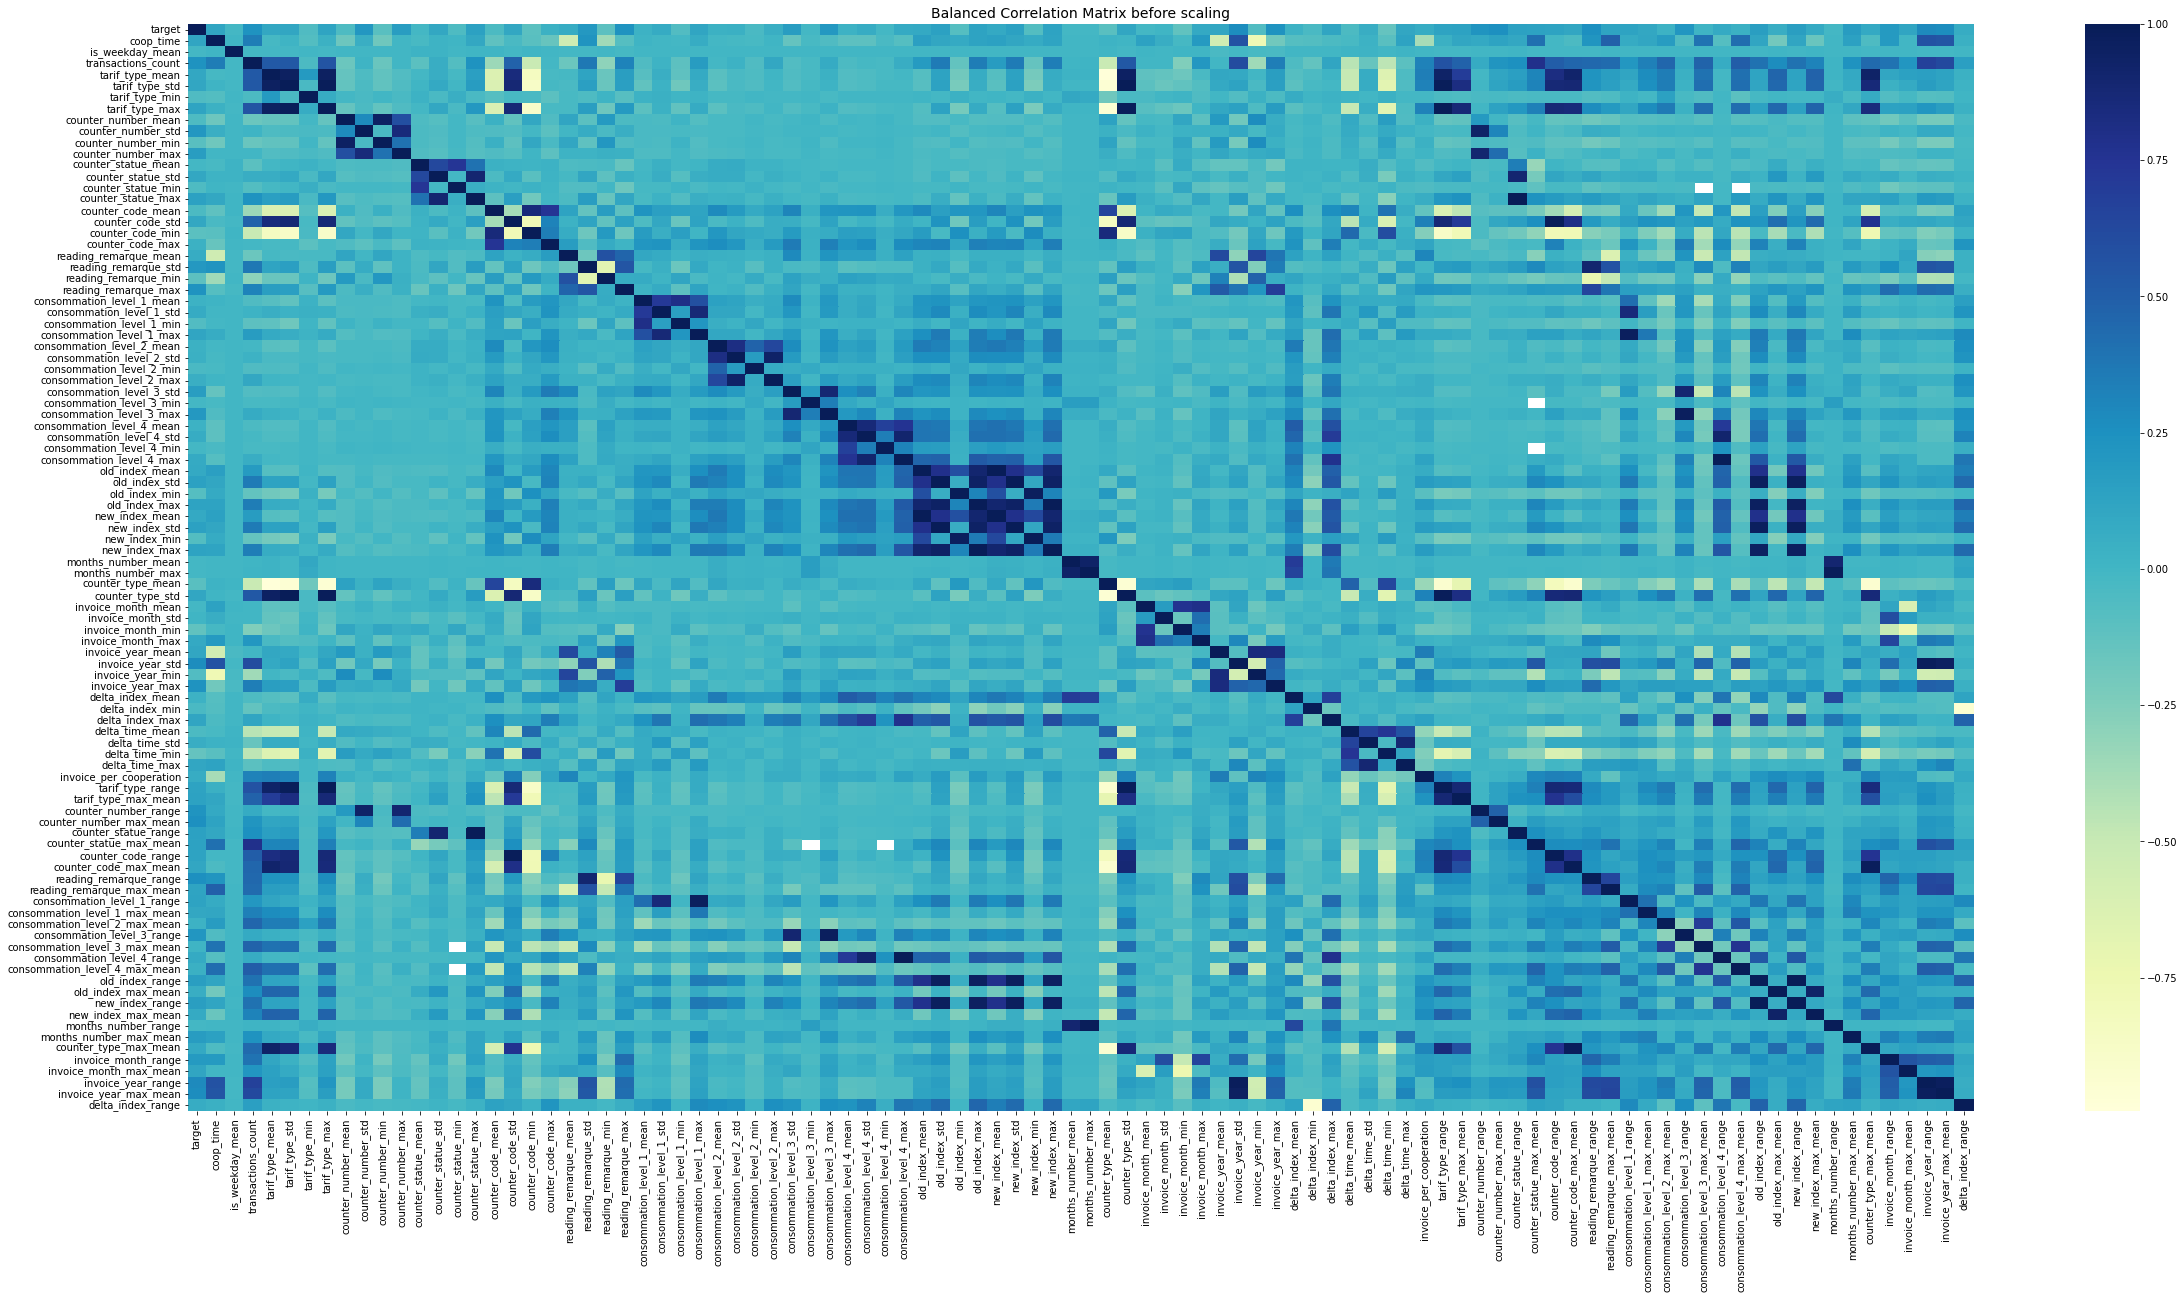

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))         

# Imbalanced DataFrame Correlation
corr = train_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix before scaling", fontsize=14)

plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

cols = ['counter_number_mean','counter_number_std','counter_number_min','counter_number_max','consommation_level_1_mean','consommation_level_1_std',
'consommation_level_1_min','consommation_level_1_max','consommation_level_2_mean','consommation_level_2_std',
'consommation_level_2_min','consommation_level_2_max','consommation_level_3_std',
'consommation_level_3_min','consommation_level_3_max','consommation_level_4_mean','consommation_level_4_std',
'consommation_level_4_min','consommation_level_4_max','old_index_mean','old_index_std','old_index_min','old_index_max',
'new_index_mean','new_index_std','new_index_min','new_index_max','months_number_mean',
'months_number_max','delta_index_mean','delta_index_min','delta_index_max',
'counter_number_range','consommation_level_1_range','consommation_level_3_range',
'consommation_level_4_range','old_index_range','new_index_range','months_number_range','delta_index_range',
'delta_time_mean','delta_time_std','delta_time_min','delta_time_max','target']

var_colums = [col for col in train_df.columns if col not in cols]
#var_colums = [col for col in var_colums1 if col in not_important_col]

X = train_df
X1 = X[cols].drop(['target'], axis=1)
X2 = X[var_colums]
y = train_df['target']
shuffled_normalized_df_1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)

train_df = pd.concat([shuffled_normalized_df_1, X2, y], axis = 1)
train_df.head()

,counter_number_mean,counter_number_std,counter_number_min,counter_number_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_2_min,consommation_level_2_max,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_std,old_index_min,old_index_max,new_index_mean,new_index_std,new_index_min,new_index_max,months_number_mean,months_number_max,delta_index_mean,delta_index_min,delta_index_max,counter_number_range,consommation_level_1_range,consommation_level_3_range,consommation_level_4_range,old_index_range,new_index_range,months_number_range,delta_index_range,delta_time_mean,delta_time_std,delta_time_min,delta_time_max,disrict,client_catg,region,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,counter_statue_mean,counter_statue_std,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_std,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_std,reading_remarque_min,reading_remarque_max,counter_type_mean,counter_type_std,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max,invoice_per_cooperation,tarif_type_range,tarif_type_max_mean,counter_number_max_mean,counter_statue_range,counter_statue_max_mean,counter_code_range,counter_code_max_mean,reading_remarque_range,reading_remarque_max_mean,consommation_level_1_max_mean,consommation_level_2_max_mean,consommation_level_3_max_mean,consommation_level_4_max_mean,old_index_max_mean,new_index_max_mean,months_number_max_mean,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,11,101,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,11,101,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,-0.109115,-0.036122,0.217999,-0.072351,1.317881,2.196616,0.516129,2.685622,1.580382,0.865838,0.000000,0.535000,4.839351,0.000000,2.968460,654.241379,1717.496052,0.000000,8790.000000,0.547135,0.900335,0.007102,1.014876,0.626769,0.954727,1.357058,1.107950,-0.990274,0.000000,3.398220,0.571429,4.022649,-0.039980,2.806998,3.018868,8790.000000,1.239614,1.221502,0.000000,4.032417,-0.613279,0.029524,0.000000,-0.015748,60,11,101,255,0.000000,3.000000,10.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,202.000000,0.000000,202.000000,202.000000,6.000000,0.000000,6.000000,6.000000,1.000000,0.000000,5.000000,4.000000,1.000000,9.000000,2005.000000,0.000000,2005.000000,2005.000000,0.011765,0.000000,1.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,8.000000,1.800000,0.000000,1.000000,0.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,11,311,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
train_df.describe()

,counter_number_mean,counter_number_std,counter_number_min,counter_number_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_2_min,consommation_level_2_max,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_std,old_index_min,old_index_max,new_index_mean,new_index_std,new_index_min,new_index_max,months_number_mean,months_number_max,delta_index_mean,delta_index_min,delta_index_max,counter_number_range,consommation_level_1_range,consommation_level_3_range,consommation_level_4_range,old_index_range,new_index_range,months_number_range,delta_index_range,delta_time_mean,delta_time_std,delta_time_min,delta_time_max,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,counter_statue_mean,counter_statue_std,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_std,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_std,reading_remarque_min,reading_remarque_max,counter_type_mean,counter_type_std,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max,invoice_per_cooperation,tarif_type_range,tarif_type_max_mean,counter_number_max_mean,counter_statue_range,counter_statue_max_mean,counter_code_range,counter_code_max_mean,reading_remarque_range,reading_remarque_max_mean,consommation_level_1_max_mean,consommation_level_2_max_mean,consommation_level_3_max_mean,consommation_level_4_max_mean,old_index_max_mean,new_index_max_mean,months_number_max_mean,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,target
count,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,58532.000000,57167.000000,58532.000000,58532.000000,255854.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59607.000000,59609.000000,22697.000000,59609.000000,59609.000000,59609.000000,59609.000000,58752.000000,40419.000000,23930.000000,12885.000000,58617.000000,59115.000000,59609.000000,59442.000000,59609.000000,59609.000000,59609.000000,59609.000000,255854.000000
mean,162301.934088,170542.594570,654318.460867,309934.157470,0.234133,0.278644,2.035562,0.350183,1.108882,0.797461,7.650875,0.732788,0.754557,2.862303,0.577009,95.641442,179.721781,7.579527,782.411549,0.384468,0.380695,2.660489,0.341611,0.385782,0.377224,1.558276,0.343725,22.793655,7.135751,0.552833,-54.315098,0.634616,284299.838454,0.297142,0.581406,774.832022,0.369776,0.368782,4.126922,1.407529,0.117760,0.382236,0.427221,0.859056,208.409581,0.000008,39.103592,17.796384,7.546344,10.963613,25.964737,0.060862,0.202627,0.008539,1.082957,195.639175,64.500215,125.775856,254.848597,7.432159,1.095946,6.229831,8.810867,0.766348,0.258082,6.266416,3.290881,2.267023,10.503464,2012.768298,2.911931,2008.034944,2017.518328,inf,15.001124,1.353322,3.681370,1.074418,34.293205,129.072741,1.439927,2.581036,1.192882,3.830270,18.636102

In [ ]:
train_df = train_df.sample(frac=1,random_state=42)
train_df.describe()

,counter_number_mean,counter_number_std,counter_number_min,counter_number_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_2_min,consommation_level_2_max,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_std,old_index_min,old_index_max,new_index_mean,new_index_std,new_index_min,new_index_max,months_number_mean,months_number_max,delta_index_mean,delta_index_min,delta_index_max,counter_number_range,consommation_level_1_range,consommation_level_3_range,consommation_level_4_range,old_index_range,new_index_range,months_number_range,delta_index_range,delta_time_mean,delta_time_std,delta_time_min,delta_time_max,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,counter_statue_mean,counter_statue_std,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_std,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_std,reading_remarque_min,reading_remarque_max,counter_type_mean,counter_type_std,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max,invoice_per_cooperation,tarif_type_range,tarif_type_max_mean,counter_number_max_mean,counter_statue_range,counter_statue_max_mean,counter_code_range,counter_code_max_mean,reading_remarque_range,reading_remarque_max_mean,consommation_level_1_max_mean,consommation_level_2_max_mean,consommation_level_3_max_mean,consommation_level_4_max_mean,old_index_max_mean,new_index_max_mean,months_number_max_mean,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,target
count,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,58532.000000,57167.000000,58532.000000,58532.000000,255854.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,58532.000000,59609.000000,59609.000000,59609.000000,59609.000000,59609.000000,59607.000000,59609.000000,22697.000000,59609.000000,59609.000000,59609.000000,59609.000000,58752.000000,40419.000000,23930.000000,12885.000000,58617.000000,59115.000000,59609.000000,59442.000000,59609.000000,59609.000000,59609.000000,59609.000000,255854.000000
mean,162301.934088,170542.594570,654318.460867,309934.157470,0.234133,0.278644,2.035562,0.350183,1.108882,0.797461,7.650875,0.732788,0.754557,2.862303,0.577009,95.641442,179.721781,7.579527,782.411549,0.384468,0.380695,2.660489,0.341611,0.385782,0.377224,1.558276,0.343725,22.793655,7.135751,0.552833,-54.315098,0.634616,284299.838454,0.297142,0.581406,774.832022,0.369776,0.368782,4.126922,1.407529,0.117760,0.382236,0.427221,0.859056,208.409581,0.000008,39.103592,17.796384,7.546344,10.963613,25.964737,0.060862,0.202627,0.008539,1.082957,195.639175,64.500215,125.775856,254.848597,7.432159,1.095946,6.229831,8.810867,0.766348,0.258082,6.266416,3.290881,2.267023,10.503464,2012.768298,2.911931,2008.034944,2017.518328,inf,15.001124,1.353322,3.681370,1.074418,34.293205,129.072741,1.439927,2.581036,1.192882,3.830270,18.636102

In [ ]:
print('The number of Non-Frauds are: ' + str(train_df['target'].value_counts()[0]) + ' which is ', round(train_df['target'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('The number of Frauds are: ' + str(train_df['target'].value_counts()[1]) + ' which is ', round(train_df['target'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

The number of Non-Frauds are: 127927 which is  50.0 % of the dataset
The number of Frauds are: 127927 which is  50.0 % of the dataset


In [ ]:
train_data_b, test_data_b = np.split(train_df.sample(frac=1, random_state=0), [int(0.78 * len(train_df))])
print(train_data_b.shape, test_data_b.shape)

train_data_b_t, test_data_b_v = np.split(train_data_b.sample(frac=1, random_state=0), [int(0.5 * len(train_data_b))])
print(train_data_b_t.shape, test_data_b_v.shape)

train_data_b_t.to_csv('train_dataset.csv', index=False)
test_data_b.to_csv('test_dataset.csv', index=False)
test_data_b_v.to_csv('validation_dataset.csv', index=False)

(199566, 99) (56288, 99)
(99783, 99) (99783, 99)


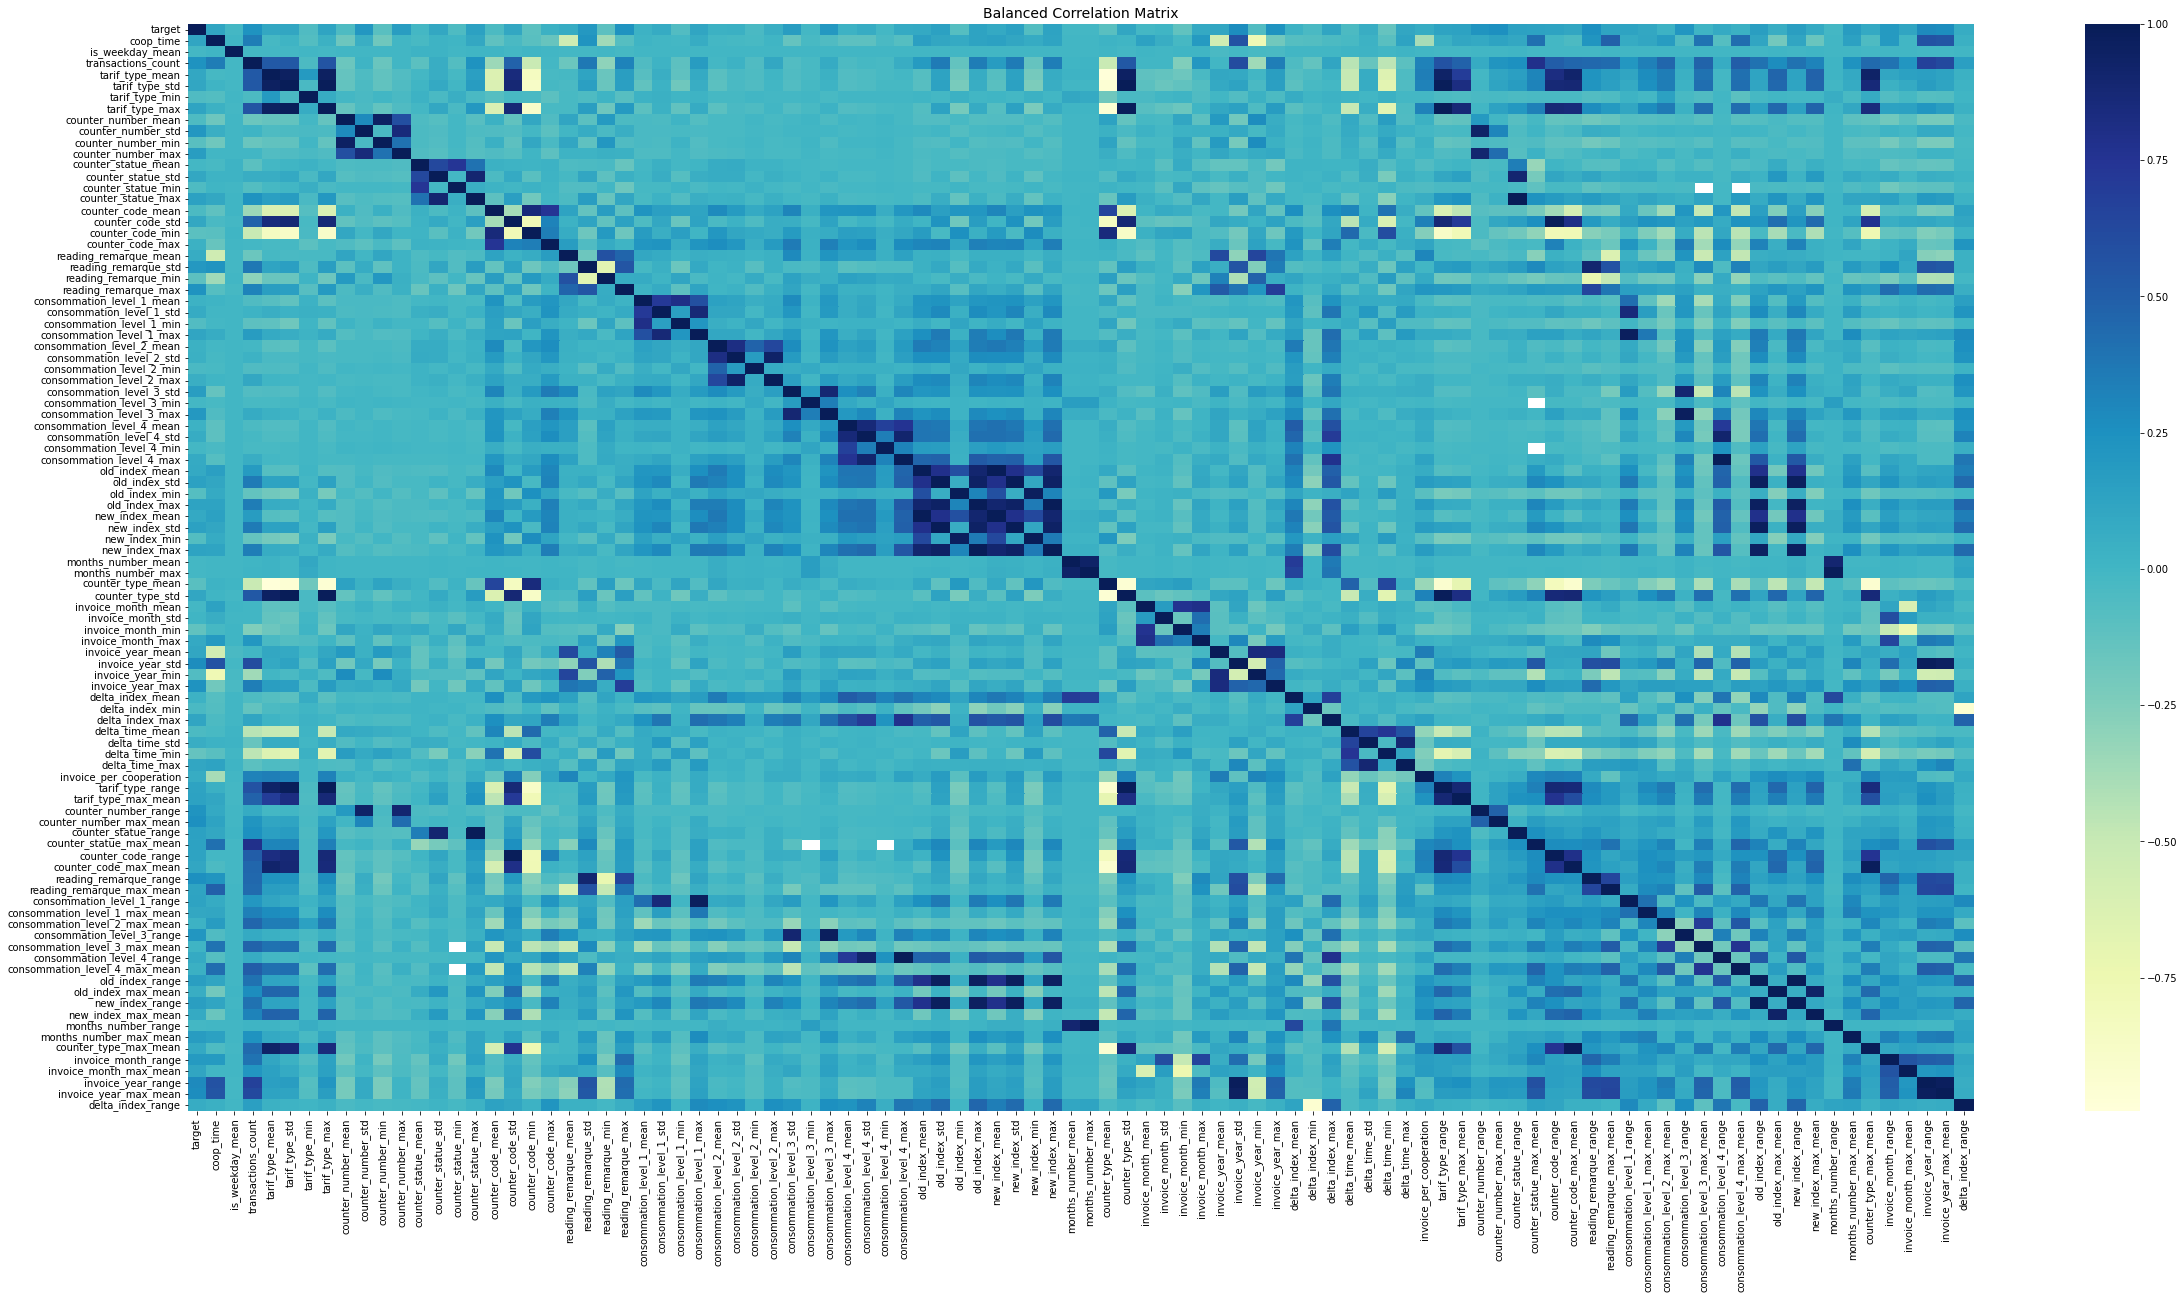

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))         

# Imbalanced DataFrame Correlation
corr = shuffled_normalized_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)

plt.show()

In [ ]:
train_data_b_t.describe()

,counter_number_mean,counter_number_std,counter_number_min,counter_number_max,consommation_level_1_mean,consommation_level_1_std,consommation_level_1_min,consommation_level_1_max,consommation_level_2_mean,consommation_level_2_std,consommation_level_2_min,consommation_level_2_max,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max,old_index_mean,old_index_std,old_index_min,old_index_max,new_index_mean,new_index_std,new_index_min,new_index_max,months_number_mean,months_number_max,delta_index_mean,delta_index_min,delta_index_max,counter_number_range,consommation_level_1_range,consommation_level_3_range,consommation_level_4_range,old_index_range,new_index_range,months_number_range,delta_index_range,delta_time_mean,delta_time_std,delta_time_min,delta_time_max,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,counter_statue_mean,counter_statue_std,counter_statue_min,counter_statue_max,counter_code_mean,counter_code_std,counter_code_min,counter_code_max,reading_remarque_mean,reading_remarque_std,reading_remarque_min,reading_remarque_max,counter_type_mean,counter_type_std,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max,invoice_per_cooperation,tarif_type_range,tarif_type_max_mean,counter_number_max_mean,counter_statue_range,counter_statue_max_mean,counter_code_range,counter_code_max_mean,reading_remarque_range,reading_remarque_max_mean,consommation_level_1_max_mean,consommation_level_2_max_mean,consommation_level_3_max_mean,consommation_level_4_max_mean,old_index_max_mean,new_index_max_mean,months_number_max_mean,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,target
count,23220.000000,22801.000000,23220.000000,23220.000000,23220.000000,22801.000000,23220.000000,23220.000000,23220.000000,22801.000000,23220.000000,23220.000000,22801.000000,23220.000000,23220.000000,23220.000000,22801.000000,23220.000000,23220.000000,23220.000000,22801.000000,23220.000000,23220.000000,23220.000000,22801.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,22801.000000,22323.000000,22801.000000,22801.000000,99783.000000,23082.000000,23082.000000,23082.000000,22671.000000,23082.000000,23082.000000,23082.000000,22671.000000,23082.000000,23082.000000,23082.000000,22671.000000,23082.000000,23082.000000,23082.000000,22671.000000,23082.000000,23082.000000,23082.000000,22671.000000,23082.000000,22671.000000,23082.000000,23082.000000,23082.000000,22671.000000,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000,23081.000000,23082.000000,8814.000000,23082.000000,23082.000000,23082.000000,23082.000000,22735.000000,15519.000000,9111.000000,4900.000000,22692.000000,22888.000000,23082.000000,23005.000000,23082.000000,23082.000000,23082.000000,23082.000000,99783.000000
mean,160728.000465,171258.151675,648956.827653,310622.875300,0.223034,0.285680,1.874146,0.357116,1.099092,0.821827,5.611413,0.749405,0.753117,2.508915,0.575113,92.851446,173.854134,7.359432,747.176098,0.388224,0.389159,2.656407,0.347080,0.388748,0.385171,1.550530,0.348709,10.685801,5.787694,0.527123,-55.270320,0.621450,285602.867638,0.310083,0.580145,739.816667,0.375952,0.374925,3.744322,1.407532,0.115475,0.390333,0.421508,0.867891,208.007747,0.000000,39.073650,17.818158,7.539048,10.980721,25.963825,0.062537,0.203933,0.009401,1.087038,194.982271,64.167104,125.478598,253.895373,7.427009,1.096332,6.226020,8.803050,0.765616,0.257967,6.274352,3.293251,2.273676,10.508275,2012.730113,2.914517,2008.001473,2017.488909,inf,14.983104,1.351705,3.645099,1.077636,34.458730,128.416775,1.440511,2.577030,1.192369,3.799389,18.837401,25.2

In [ ]:
train_data_b = train_data_b_t
train_data_v = test_data_b_v
test_data_b = test_data_b

In [ ]:
x_train = train_data_b
y_train=x_train.pop(["target"])

x_test = test_data_b
y_test = x_test.pop("target")

cat_columns = x_train.select_dtypes(['category']).columns
x_train[cat_columns] = x_train[cat_columns].apply(lambda x: x.cat.codes)
x_test[cat_columns] = x_test[cat_columns].apply(lambda x: x.cat.codes)

KeyError: ignored

In [ ]:
pd.concat([train_data_b['target'], train_data_b.drop(['target'], axis=1)], axis=1).to_csv('train_dataset.csv', index=False, header=False)
pd.concat([train_data_v['target'], train_data_v.drop(['target'], axis=1)], axis=1).to_csv('validation_dataset.csv', index=False, header=False)
pd.concat([test_data_b['target'], test_data_b.drop(['target'], axis=1)], axis=1).to_csv('test_dataset.csv', index=False, header=False)


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=300)


In [ ]:
param = {'max_depth':13,
    'subsample':0.9,
    'n_estimators':1300,
    'learning_rate':0.025,
    'gamma':0.3,
    'colsample_bylevel':1,
    'colsample_bytree':1,
    'random_state':0,
    'min_child_weight':1,
    'reg_lambda':0.5,
    'objective':'binary:logistic',
    'num_round':300}
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc","error"]

In [ ]:
%time model.fit(x_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: user 1min 18s, sys: 475 ms, total: 1min 19s
Wall time: 1min 25s


XGBClassifier(n_estimators=300)

In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
y_predicted

array([1., 1., 0., ..., 0., 1., 1.])